In [1]:
%pip install numpy imageio matplotlib opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
import cv2

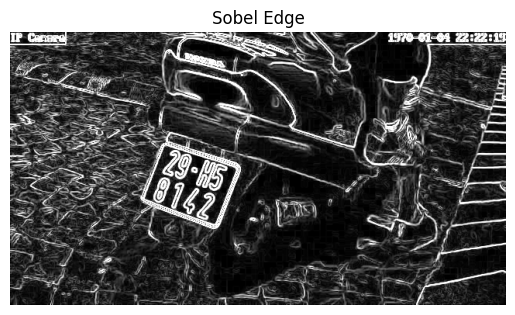

In [39]:
# Read image as grayscale
img = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Sobel X
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
# Sobel Y
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
# Combine the two gradients
sobel = cv2.magnitude(sobelx, sobely)
sobel = np.uint8(np.clip(sobel, 0, 255))



plt.imshow(sobel, cmap='gray')
plt.title('Sobel Edge')
plt.axis('off')
plt.show()



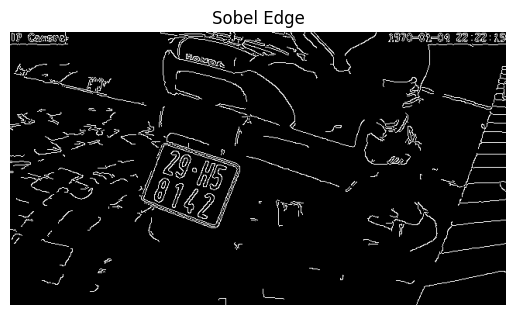

In [42]:
img = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Canny edge detection, double threshold: 100 and 200
edges = cv2.Canny(img, 150, 300)

plt.imshow(edges, cmap='gray')
plt.title('Sobel Edge')
plt.axis('off')
plt.show()

/var/folders/1w/twwwxg6x38zbx4ctj1h9flxw0000gn/T/ipykernel_55368/2686493468.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread('test.jpg', mode = 'F')


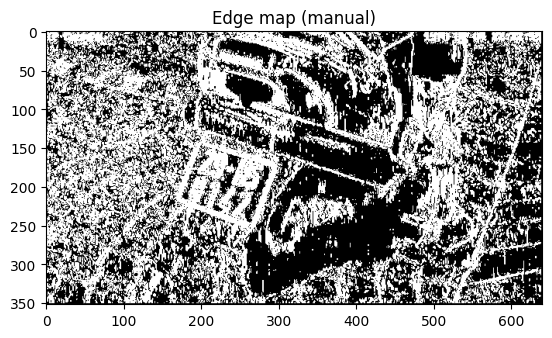

In [36]:
img = imread('test.jpg', mode = 'F')
img = img.astype(float)
# Sobel kernels
#Kx = np.array([[1,0,1],[2,0,2],[1,0,1]])
#Ky = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

Kx = np.array([[-2, 0,2],
               [-3, 0, 3],
               [-2, 0, 2]])
Ky = np.array([[-4, 0, 4],
               [ -2,  0, 2],
               [ -2,  0, 2]])

def convolve(img, kernel):
    m, n = kernel.shape
    y, x = img.shape
    out = np.zeros((y, x))
    for i in range(1, y-1):
        for j in range(1, x-1):
            window = img[i-1:i+2, j-1:j+2]
            out[i,j] = np.sum(window * kernel)
    return out
Ix = convolve(img, Kx)
Iy = convolve(img, Ky)
G = np.sqrt(Ix**2 + Iy**2)
edges = (G > 40).astype(np.uint8) * 255  # threshold at 100
plt.imshow(edges, cmap='gray')
plt.title('Edge map (manual)')
plt.show()